<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>
<hr />

# <h1 align="center"> Day-4- Regression Analysis Part 1 </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>




## In-class Tutorial + Exercise

## Part 1.  Linear Regression

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

In [2]:
# iq_data_url = "https://drive.google.com/file/d/12exhA6rYPHwanHidmlKVjM1r6-9YrIMY/view?usp=sharing"
# iq_data_url2 ='https://drive.google.com/uc?id=' + iq_data_url.split('/')[-2]
# df_iq = pd.read_csv(iq_data_url2, sep = "\t")

df_iq = pd.read_csv('iqsize.txt', sep="\t")
df_iq.head(), df_iq.describe(), df_iq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PIQ     38 non-null     int64  
 1   Brain   38 non-null     float64
 2   Height  38 non-null     float64
 3   Weight  38 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.3 KB


(   PIQ   Brain  Height  Weight
 0  124   81.69    64.5     118
 1  150  103.84    73.3     143
 2  128   96.54    68.8     172
 3  134   95.15    65.0     147
 4  110   92.88    69.0     146,
               PIQ       Brain     Height      Weight
 count   38.000000   38.000000  38.000000   38.000000
 mean   111.342105   90.675789  68.421053  151.052632
 std     22.597867    7.256279   3.993790   23.478509
 min     72.000000   79.060000  62.000000  106.000000
 25%     89.250000   85.485000  66.000000  135.250000
 50%    115.000000   90.540000  68.000000  146.500000
 75%    128.000000   94.955000  70.375000  172.000000
 max    150.000000  107.950000  77.000000  192.000000,
 None)

##  Linear Regression

**Is a person's brain size and body size predictive of his or her intelligence?**

Interested in answering the above research question, some researchers (Willerman, et al, 1991) collected
the following data (iqsize.txt) on a sample of n = 38 college students:
- Response (y): Performance IQ scores (PIQ) from the revised Wechsler Adult Intelligence Scale. This variable served as the investigator’s measure of the individual’s intelligence.
- Potential predictor (x1): Brain size based on the count obtained from MRI scans (given as count/10000).
- Potential predictor (x2): Height in inches.
- Potential predictor (x3): Weight in pounds.



In [3]:
# obtaining correlation matrix
corr = df_iq.corr()
corr

,PIQ,Brain,Height,Weight
PIQ,1.000000,0.377815,-0.093156,0.002512
Brain,0.377815,1.000000,0.588367,0.513487
Height,-0.093156,0.588367,1.000000,0.699614
Weight,0.002512,0.513487,0.699614,1.000000


In [4]:
np.triu(corr)

array([[ 1.        ,  0.37781546, -0.09315559,  0.00251215],
       [ 0.        ,  1.        ,  0.58836684,  0.51348697],
       [ 0.        ,  0.        ,  1.        ,  0.699614  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

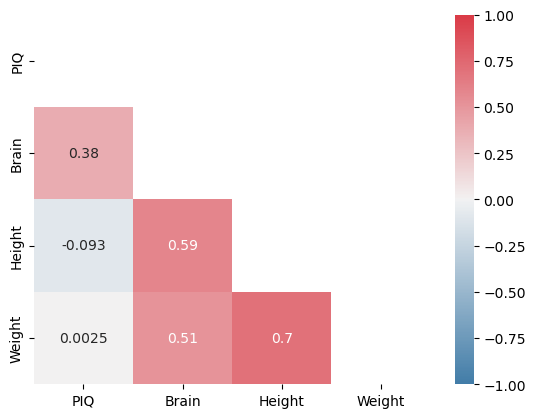

In [5]:
mask = np.triu(corr)                  # returning only the upper triangle of an array
cmap = sns.diverging_palette(240, 10, as_cmap=True)

sns.heatmap(
    corr,
    mask = mask,
    vmin = -1,
    vmax = 1,
    cmap = cmap,
    annot = True,
);

The correlation plot has been provided. Can you already draw some conclusions from it?  

-  a **high** correlation between body weight with height (0.7) and brain weight (0.51)
-  a **high** correlation between height and brain weight (0.59)
-  a **low** correlation between PIQ with brain weight, height, and body weight (<0.4).

## VIF (Variance Inflation Factor)
- measures the increase in the variance of a regression coefficient caused by multicollinearity among predictor variables.
- process: regrssing each independent variable against all other independent variables in the model to calculate the coefficient of determination or R2.

- High values -> strongly multicollinearity
- low values -> low collinearity


In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_out = pd.DataFrame()
vif_out['feature'] = df_iq.columns
print(vif_out)

vif_out['VIF'] = [variance_inflation_factor(df_iq[['PIQ', 'Brain', 'Height', 'Weight']].values, i) for i in range(len(df_iq.columns))]
vif_out


  feature
0     PIQ
1   Brain
2  Height
3  Weight


,feature,VIF
0,PIQ,33.682712
1,Brain,354.568861
2,Height,303.118312
3,Weight,72.664200


<br>

### Exercise:

**(a) Data analysis:**

Visualize the data appropriately. Hint: use the function df.plot(), sns.boxplot, sns.regplot, and so on.

You can be as creative as you like. For more examples, view: https://seaborn.pydata.org/examples/index.html

<Axes: xlabel='Weight', ylabel='PIQ'>

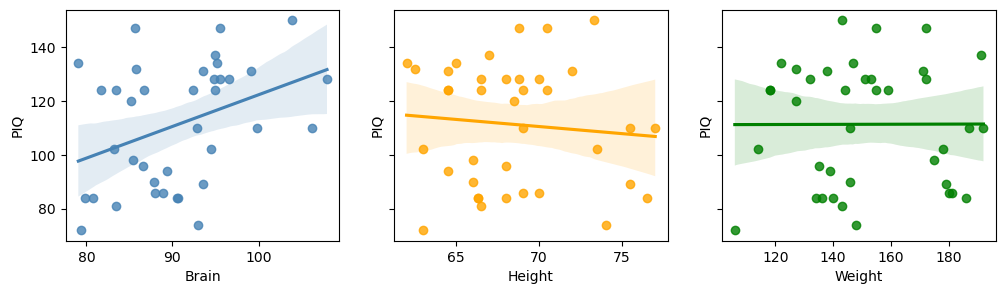

In [7]:
# your code here
# regression plot 
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
axs.flatten()

sns.regplot(ax=axs[0], data=df_iq, y='PIQ', x='Brain', color='steelblue')
sns.regplot(ax=axs[1], data=df_iq, y='PIQ', x='Height', color='orange')
sns.regplot(ax=axs[2], data=df_iq, y='PIQ', x='Weight', color='green')

In [8]:
df_iq_melt = df_iq.melt(id_vars=['PIQ'], value_vars=['Brain', 'Height', 'Weight'], var_name='Char', value_name='value')
df_iq_melt

,PIQ,Char,value
0,124,Brain,81.69
1,150,Brain,103.84
2,128,Brain,96.54
3,134,Brain,95.15
4,110,Brain,92.88
...,...,...,...
109,128,Weight,153.00
110,124,Weight,144.00
111,94,Weight,139.00
112,74,Weight,148.00


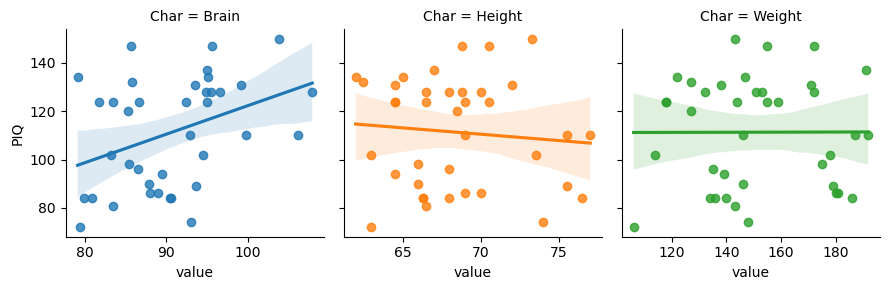

In [ ]:
# lmplot
sns.lmplot(data=df_iq_melt, x='value', y='PIQ', col='Char', hue='Char', height=3, 
        facet_kws=dict(sharex=False, legend_out=True))

**(b) Describe the output from (a). What appears to be a good predictor?**
- As per the plots, brain size seems to be a good predictor on the PIQ.
<br><br>

Slope --
- A positive slope between brain size and PIQ -> larger brain is associated with higher IQ.
- A mild negative slope between height and PIQ and a neutral slope between body weight and PIQ -> they are not very useful predictors.

**(c) Implement the model in Python.**
- Linear regression model for the predictor 'Brain'

In [15]:
# your code here
lm = sm.OLS(df_iq['PIQ'], df_iq['Brain'])        # ordinary least square regression model
result = lm.fit()

**(d) Write down the model equation.**

In [ ]:
# your code here



**(e) Interpret the model output.**

In [16]:
# your code here
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    PIQ   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1082.
Date:                Thu, 14 Aug 2025   Prob (F-statistic):                    5.38e-29
Time:                        00:49:25   Log-Likelihood:                         -168.97
No. Observations:                  38   AIC:                                      339.9
Df Residuals:                      37   BIC:                                      341.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Interpretation --


- The output shows that the regression model fits the data well with an R-squared of 0.967.
- The independent variable 'Brain' is highly significant (p < 0.001) and has a strong positive effect on the IQ.
- Residuals are normally distributed as indicated by the Omnibus and Jarque-Bera test p-values (> 0.05).
- The Durbin-Watson value is 1.46, indicating no autocorrelation in residuals.
- The overall model is statistically significant with a high F-statistic (1082) and a near-zero p-value (5.38e-29).

#### Checking assumptions

Text(0.5, 0, 'Var_id')

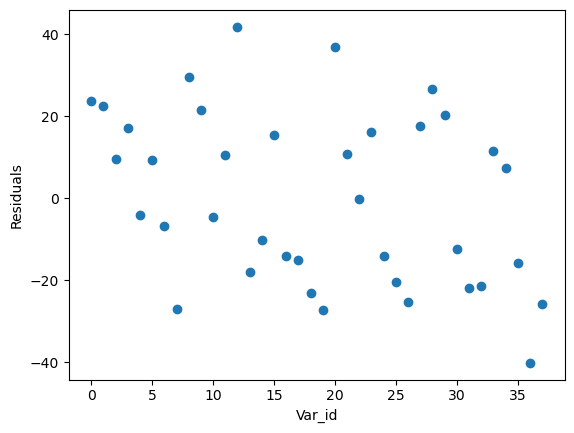

In [23]:
# plot residuals
plt.scatter(np.arange(len(result.resid)), result.resid)
plt.ylabel('Residuals')
plt.xlabel('Var_id')

In [ ]:
stats.shapiro(result.resid)

# p>0.05 -> residuals are normally distributed

ShapiroResult(statistic=np.float64(0.9587519015503662), pvalue=np.float64(0.17285186219640308))

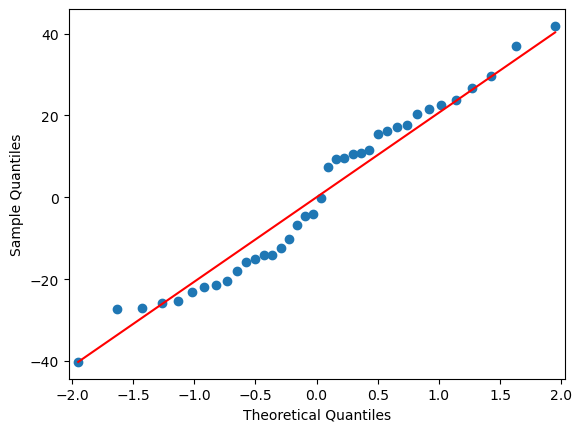

In [31]:
# qq plot
sm.qqplot(result.resid, line='s');